# **Keras Model Performance Analysis**
---



---



Using the MNIST model we trained in the previously part and analyze it's performance:
1. Load our Keras Model and Data
2. View the images we misclassified
3. Create a Confusion Matrix
4. Create Classification Report


## **1. Load our Keras Model and the MNIST Dataset**

**Download our previous model and Load it with load_model**

In [ ]:
!gdown --id 1jW5aHd7_fAi3UrbT9MRTDbKyxjwfQ3WC

/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=1jW5aHd7_fAi3UrbT9MRTDbKyxjwfQ3WC
To: /content/mnist_simple_cnn_10_Epochs.h5
100% 4.82M/4.82M [00:00<00:00, 19.0MB/s]


In [ ]:
# We need to import our load_model function 
from tensorflow.keras.models import load_model

model = load_model('mnist_simple_cnn_10_Epochs.h5')

#### **Load our MNIST dataset**

In [ ]:
# We can load the built in datasets from this function
from tensorflow.keras.datasets import mnist
  
# loads the MNIST training and test dataset 
(x_train, y_train), (x_test, y_test)  = mnist.load_data()

11490434/11490434 [==============================] - 2s 0us/step


# **2. Viewing Our Misclassifications**

In [ ]:
import numpy as np

# We reshape our test data
print(x_test.shape)
x_test = x_test.reshape(10000, 28, 28, 1)
print(x_test.shape)

# Get the prediction for all 10k samples in our test data
print("Predicting classes for all 10,000 test images...")
pred = np.argmax(model.predict(x_test), axis=-1)
print("Completed.\n")

(10000, 28, 28)
(10000, 28, 28, 1)
Predicting classes for all 10,000 test images...
313/313 [==============================] - 9s 2ms/step
Completed.



In [ ]:
import cv2
import numpy as np

# Use numpy to create an array that stores a value of 1 when a misclassification occurs
result = np.absolute(y_test - pred)
misclassified_indices = np.nonzero(0 < result)

#  Display the indices of mislassifications
print(f"Indices of misclassifed data are: \n{misclassified_indices}")
print(len(misclassified_indices[0]))

Indices of misclassifed data are: 
(array([   8,   33,   62,   92,  149,  193,  233,  241,  247,  259,  290,
        300,  313,  318,  320,  321,  340,  362,  412,  444,  445,  448,
        478,  479,  502,  507,  531,  543,  565,  578,  591,  613,  619,
        628,  659,  684,  689,  691,  707,  717,  720,  726,  740,  791,
        839,  874,  939,  947,  950,  951,  959,  965,  975, 1003, 1014,
       1032, 1039, 1044, 1062, 1107, 1112, 1114, 1173, 1181, 1182, 1191,
       1192, 1194, 1198, 1204, 1206, 1226, 1232, 1234, 1242, 1247, 1256,
       1260, 1283, 1289, 1299, 1319, 1326, 1328, 1337, 1378, 1393, 1440,
       1444, 1453, 1494, 1500, 1522, 1527, 1530, 1549, 1553, 1569, 1581,
       1609, 1621, 1634, 1671, 1678, 1681, 1709, 1717, 1718, 1754, 1772,
       1790, 1800, 1813, 1850, 1857, 1865, 1878, 1880, 1883, 1901, 1911,
       1917, 1930, 1940, 1952, 1970, 1981, 1984, 2016, 2024, 2035, 2040,
       2043, 2044, 2053, 2070, 2093, 2098, 2109, 2118, 2125, 2129, 2130,
       2135, 21

### **Visualizing the Images From Our Dataset**

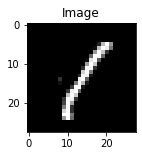

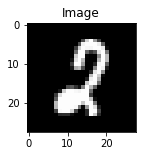

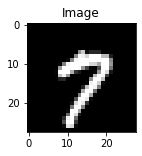

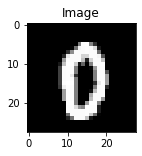

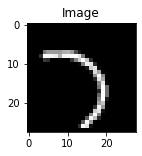

In [ ]:
# import opencv and numpy
import cv2 
import numpy as np
from matplotlib import pyplot as plt

def showImg(title, image, size):

    if not image.any():
      print("Image not found")
    else:
      width, height = image.shape[0], image.shape[1]
      aspect_ratio = width/height
      plt.figure(figsize=(size * aspect_ratio, size))
      plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
      plt.title(title)
      plt.show()


# Use OpenCV to display 5 random images from our dataset
for i in range(0, 5):
    random_num = np.random.randint(0, len(x_train))
    img = x_train[random_num]
    showImg("Image", img, size = 2)

### **Visualizing the Images Our Model Misclassified**

1/1 [==============================] - 0s 17ms/step


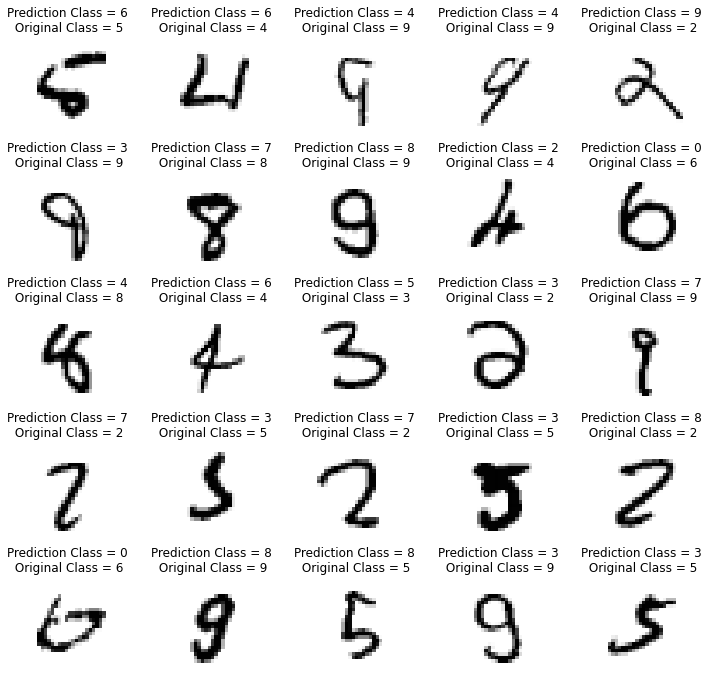

In [ ]:
fig, axes = plt.subplots(5, 5, figsize = (12,12))
axes = axes.ravel()

for i in np.arange(0, 5 * 5):  
    input_im = x_test[misclassified_indices[0][i]]
    ind = misclassified_indices[0][i]
    predicted_class = str(np.argmax(model.predict(input_im.reshape(1,28,28,1)), axis=-1)[0])
    axes[i].imshow(input_im.reshape(28,28), cmap='gray_r')
    axes[i].set_title(f"Prediction Class = {predicted_class}\n Original Class = {y_test[ind]}")
    axes[i].axis('off')

plt.subplots_adjust(wspace=0.5)

# **3. Creating our Confusion Matrix**

We use Sklean's Confusion Matrix tool to create it. All we need is:
1. The true labels
2. The predicted labels



#### **Interpreting the Confusion Matrix**
![](https://github.com/rajeevratan84/ModernComputerVision/raw/main/CleanShot%202020-11-30%20at%2010.46.45.png)

In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix

x_test = x_test.reshape(10000, 28, 28, 1) 
y_pred = np.argmax(model.predict(x_test), axis=-1)

print(confusion_matrix(y_test, y_pred))

313/313 [==============================] - 1s 2ms/step
[[ 966    0    0    2    0    3    4    3    2    0]
 [   0 1116    3    2    0    0    4    0    9    1]
 [   9    1  956   16    9    3    7    8   19    4]
 [   1    1    7  958    0    9    2    7   15   10]
 [   1    0    6    0  937    0    6    2    2   28]
 [   8    3    1   27    3  819    9    2   12    8]
 [   9    4    3    1    9    8  918    2    4    0]
 [   0    5   15    6    6    0    0  968    3   25]
 [   5    3    0   15    5    8    7    6  917    8]
 [   4    6    2   12   26    3    1   10    6  939]]


### **Creating a more presentable plot**

We'll reuse this nicely done function from the sklearn documentation on plotting a confusion matrix using color gradients and labels.

In [ ]:
import numpy as np


def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):
    """
    given a sklearn confusion matrix (cm), make a nice plot

    Arguments
    ---------
    cm:           confusion matrix from sklearn.metrics.confusion_matrix

    target_names: given classification classes such as [0, 1, 2]
                  the class names, for example: ['high', 'medium', 'low']

    title:        the text to display at the top of the matrix

    cmap:         the gradient of the values displayed from matplotlib.pyplot.cm
                  see http://matplotlib.org/examples/color/colormaps_reference.html
                  plt.get_cmap('jet') or plt.cm.Blues

    normalize:    If False, plot the raw numbers
                  If True, plot the proportions

    Usage
    -----
    plot_confusion_matrix(cm           = cm,                  # confusion matrix created by
                                                              # sklearn.metrics.confusion_matrix
                          normalize    = True,                # show proportions
                          target_names = y_labels_vals,       # list of names of the classes
                          title        = best_estimator_name) # title of graph

    Citiation
    ---------
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html

    """
    import matplotlib.pyplot as plt
    import numpy as np
    import itertools

    accuracy = np.trace(cm) / np.sum(cm).astype('float')
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()

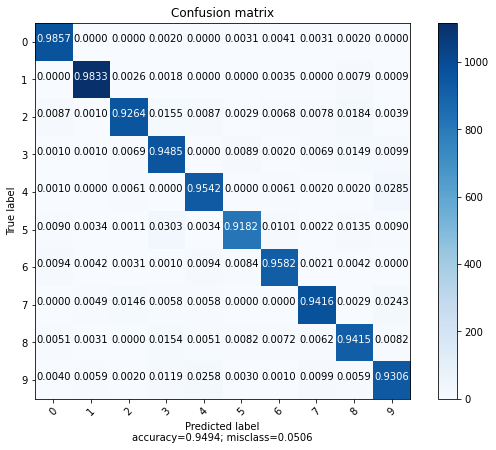

In [ ]:
target_names = list(range(0,10))
conf_mat = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(conf_mat, target_names)

## **Let's look at our per-class accuracy**

In [ ]:
# Per-class accuracy
class_accuracy = 100 * conf_mat.diagonal() / conf_mat.sum(1)

for (i, classAccuracy) in enumerate(class_accuracy):
    print(f'Accuracy for {i} : {classAccuracy:.3f}%')

Accuracy for 0 : 98.571%
Accuracy for 1 : 98.326%
Accuracy for 2 : 92.636%
Accuracy for 3 : 94.851%
Accuracy for 4 : 95.418%
Accuracy for 5 : 91.816%
Accuracy for 6 : 95.825%
Accuracy for 7 : 94.163%
Accuracy for 8 : 94.148%
Accuracy for 9 : 93.062%


### **4. Now let's look at the Classification Report**

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.99      0.97       980
           1       0.98      0.98      0.98      1135
           2       0.96      0.93      0.94      1032
           3       0.92      0.95      0.94      1010
           4       0.94      0.95      0.95       982
           5       0.96      0.92      0.94       892
           6       0.96      0.96      0.96       958
           7       0.96      0.94      0.95      1028
           8       0.93      0.94      0.93       974
           9       0.92      0.93      0.92      1009

    accuracy                           0.95     10000
   macro avg       0.95      0.95      0.95     10000
weighted avg       0.95      0.95      0.95     10000



### **4.1 Review of Recall**

![](https://github.com/rajeevratan84/ModernComputerVision/raw/main/CleanShot%202020-11-30%20at%2011.11.12.png)

### **4.2 Review of Precision**

![](https://github.com/rajeevratan84/ModernComputerVision/raw/main/CleanShot%202020-11-30%20at%2011.11.22.png)